# Bank Customers Churn

Based on the dataset provided by [Santosh kumar](https://www.kaggle.com/santoshd3/bank-customers) lets predict whether a customer is going to stay (churn) with the company (bank) or not. 

For this project we are going to use different classifiers (since its a binary problem) in order to find the best score.
***

## Exploratory analysis

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the dataset
data = pd.read_csv('data/Churn_Modeling.csv', index_col='RowNumber')
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Getting to know the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
data.nunique()

CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [6]:
# We can drop some features before continuing
data.drop(['Surname', 'CustomerId'], axis=1, inplace=True)

### Plotting

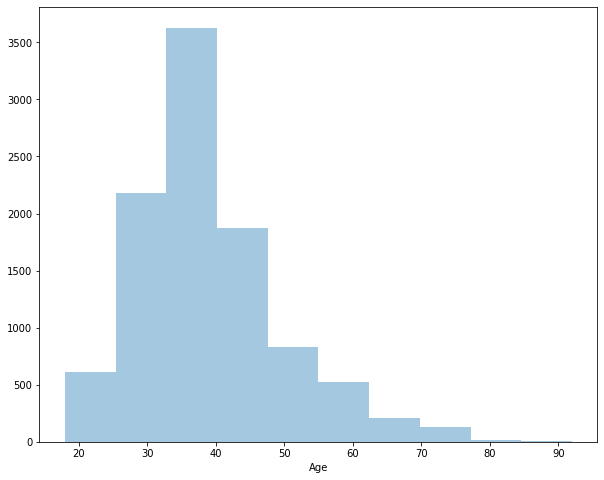

In [7]:
# Age distribution
plt.figure(figsize=(10,8))
sns.distplot(data['Age'], kde=False, bins = 10)

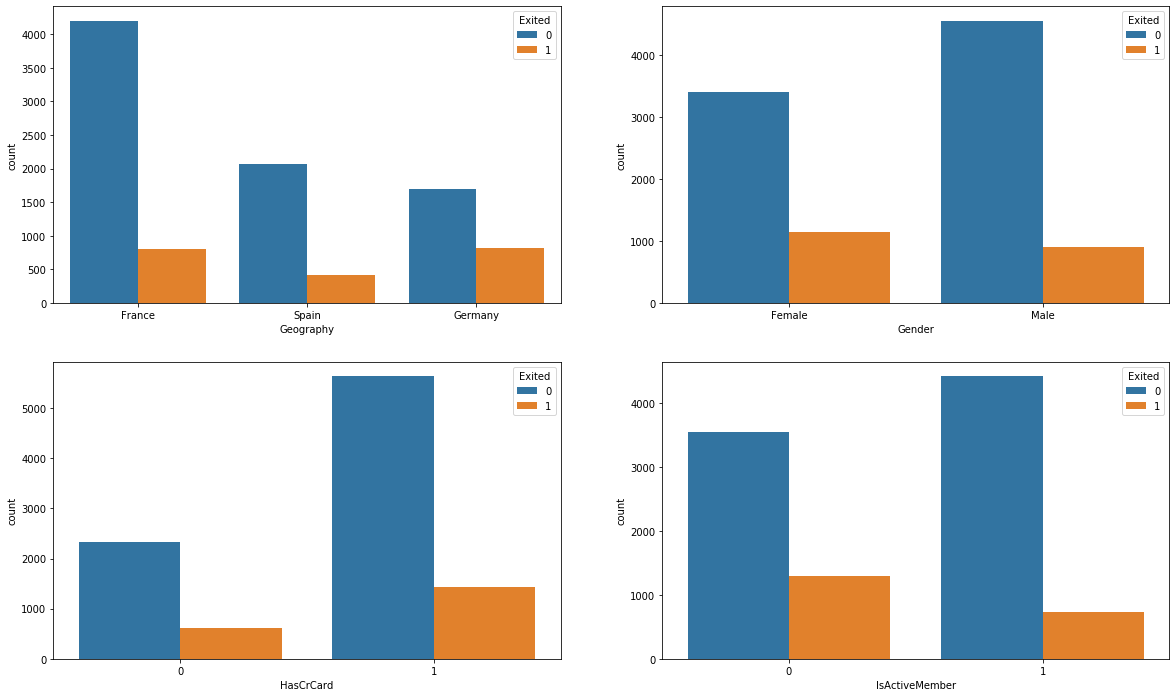

In [8]:
# Relationship between churn and categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))

sns.countplot(x='Geography', hue = 'Exited', data = data, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited', data = data, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited', data = data, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited', data = data, ax=axarr[1][1])

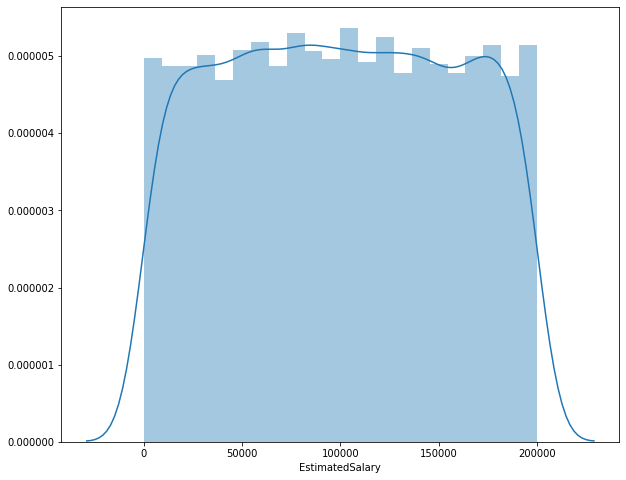

In [9]:
# Quantify people by their salary
plt.figure(figsize=(10,8))
sns.distplot(data['EstimatedSalary'])

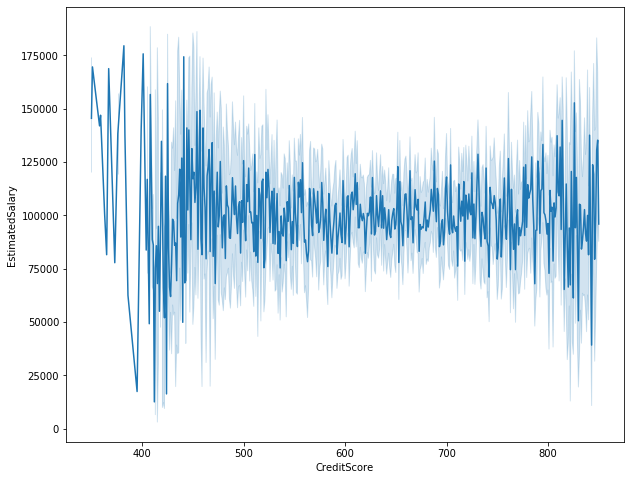

In [10]:
# Relationship between credit score and salary
plt.figure(figsize=(10,8))
sns.lineplot(x = data['CreditScore'], y = data['EstimatedSalary'], data = data)

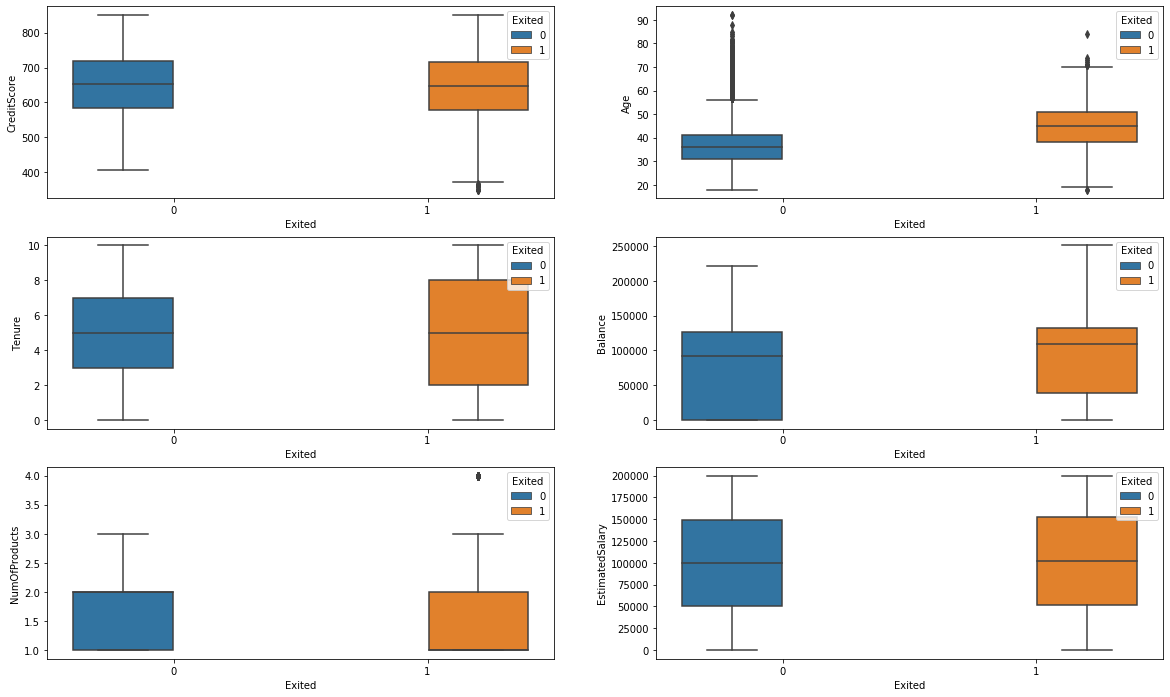

In [11]:
# Relationship between churn and continous variables
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))

sns.boxplot(y='CreditScore', x = 'Exited', hue = 'Exited', data = data, ax=axarr[0][0])
sns.boxplot(y='Age', x = 'Exited', hue = 'Exited', data = data , ax=axarr[0][1])
sns.boxplot(y='Tenure', x = 'Exited', hue = 'Exited', data = data, ax=axarr[1][0])
sns.boxplot(y='Balance', x = 'Exited', hue = 'Exited', data = data, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts', x = 'Exited', hue = 'Exited', data = data, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary', x = 'Exited', hue = 'Exited', data = data, ax=axarr[2][1])

<Figure size 720x576 with 0 Axes>

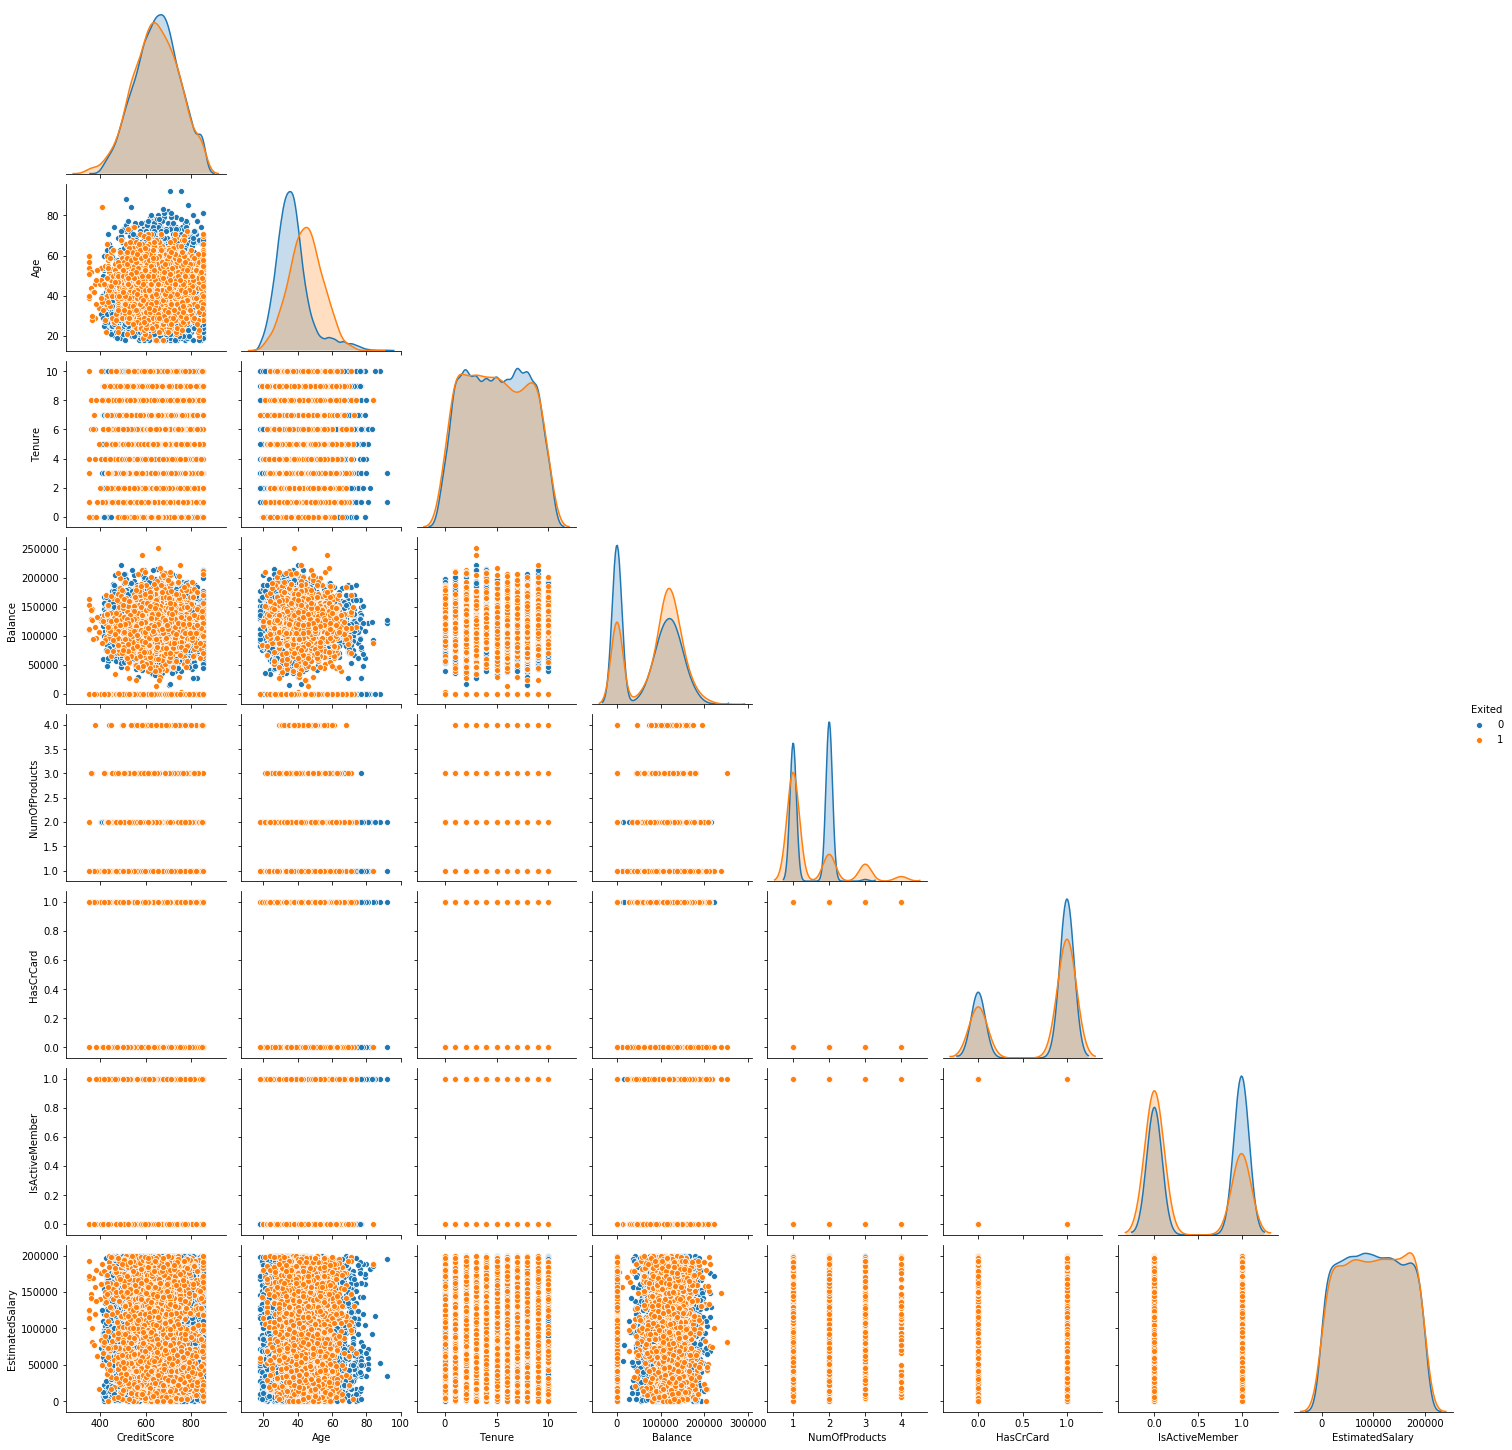

In [12]:
plt.figure(figsize=(10,8))
sns.pairplot(data = data, hue = 'Exited', corner = True)

***
## Data Preparation

### Converting every feature to numeric

In [13]:
# Importing necessary library
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()

for col in list(data.columns):
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

### Splitting data into train and test set

In [15]:
# Importing necessary library
from sklearn.model_selection import train_test_split

In [16]:
# Splitting the target column
y = data['Exited']
X = data.drop(['Exited'], axis = 1)

In [17]:
# Splitting train and test
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.3, random_state=11)

***
## Modeling

In [18]:
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from tensorflow import keras
from sklearn.metrics import accuracy_score

C:\Users\guilh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\guilh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\guilh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\guilh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [19]:
# Starting a score list
score_list = {}

### Logistic Regression

In [20]:
lr = LogisticRegression(max_iter = 1000)

lr.fit(X_train, y_train)

pred_lr = lr.predict(X_test)

score_lr = accuracy_score(y_test, pred_lr)
score_list['Logistic Regression'] = [score_lr]

In [21]:
score_lr

0.7836666666666666

### Random Forest

In [22]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

pred_rf = rf.predict(X_test)

score_rf = accuracy_score(y_test, pred_rf)
score_list['Random Forest'] = [score_rf]

In [23]:
score_rf

0.8566666666666667

### KNN

In [24]:
# Defining best n
score_knn = 0
best_n = 0
for n in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors = n)
    
    knn.fit(X_train, y_train)
    
    pred = knn.predict(X_test)
    score = accuracy_score(y_test, pred)
    if score > score_knn:
        score_knn = score
        best_n = n

score_list['KNN'] = [score_knn]

In [25]:
print(f'The best score is {score_knn} for n = {best_n}')

The best score is 0.791 for n = 20


### Gradient Boosting Classifier

In [26]:
gbc = GradientBoostingClassifier()

gbc.fit(X_train, y_train)

pred_gbc = gbc.predict(X_test)

score_gbc = accuracy_score(y_test, pred_gbc)
score_list['Gradient Boosting'] = [score_gbc]

In [27]:
score_gbc

0.861

### SVM

In [28]:
svm = SVC()

svm.fit(X_train, y_train)

pred_svm = svm.predict(X_test)

score_svm = accuracy_score(y_test, pred_svm)
score_list['SVM'] = [score_svm]

In [29]:
score_svm

0.7916666666666666

### XGBoost

In [30]:
xgb = XGBClassifier()

xgb.fit(X_train, y_train)

pred_xgb = xgb.predict(X_test)

score_xgb = accuracy_score(y_test, pred_xgb)
score_list['SVM'] = [score_xgb]

In [31]:
score_xgb

0.8603333333333333

### Neural Network

In [32]:
model = keras.Sequential()

model.add(keras.layers.Dense(128, input_dim = 10, activation = 'relu'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(32, activation = 'relu'))

model.add(keras.layers.Dense(1, activation = 'sigmoid'))

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 6,081
Trainable params: 5,825
Non-trainable params: 256
_________________________________________________________________


In [33]:
opt = keras.optimizers.Adam(learning_rate=0.00001)

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [34]:
history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test))

Train on 7000 samples, validate on 3000 samples
Epoch 1/15
7000/7000 [==============================] - 1s 90us/sample - loss: 0.6806 - acc: 0.5420 - val_loss: 0.6484 - val_acc: 0.5680
Epoch 2/15
7000/7000 [==============================] - 0s 41us/sample - loss: 0.6379 - acc: 0.5969 - val_loss: 0.6186 - val_acc: 0.7277
Epoch 3/15
7000/7000 [==============================] - 0s 41us/sample - loss: 0.6055 - acc: 0.7316 - val_loss: 0.5935 - val_acc: 0.7627
Epoch 4/15
7000/7000 [==============================] - 0s 41us/sample - loss: 0.5799 - acc: 0.7709 - val_loss: 0.5738 - val_acc: 0.7820
Epoch 5/15
7000/7000 [==============================] - 0s 41us/sample - loss: 0.5626 - acc: 0.7890 - val_loss: 0.5587 - val_acc: 0.7893
Epoch 6/15
7000/7000 [==============================] - 0s 44us/sample - loss: 0.5487 - acc: 0.7954 - val_loss: 0.5474 - val_acc: 0.7900
Epoch 7/15
7000/7000 [==============================] - 0s 54us/sample - loss: 0.5374 - acc: 0.7960 - val_loss: 0.5385 - val_acc: 

In [35]:
pred_nn = model.predict_classes(X_test)

score_nn = accuracy_score(y_test, pred_nn)
score_list['Neural Network'] = [score_nn]

In [36]:
score_nn

0.7906666666666666

***
## Results

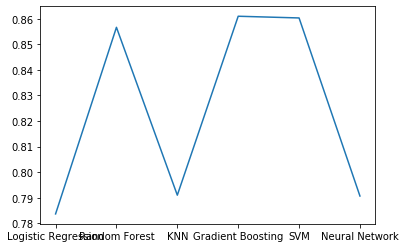

In [52]:
results = pd.DataFrame(score_list)

plt.plot(results.iloc[0])